In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
%matplotlib inline
from numpy import sin, cos

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

figsize = (4.5, 3.5)
plt.style.use("thesis")

#plt.rcParams['axes.labelsize'] = 16

def nudot(time, P, tauP, tauAge, theta, chi, n=3):
    theta = np.radians(theta)
    chi = np.radians(chi)
    psi = 2*np.pi*time/tauP + np.pi/2
    a = 1./(P*tauAge)
    b = -1 + n * time/tauAge
    c = 2*theta*np.cos(chi)/np.sin(chi)*np.sin(psi)
    d = - 0.5 * theta**2*np.cos(2*psi)
    return a * (b + c + d)

In [2]:
# Standard values
R = 1e6
c = 3e10
I0 = 1e45

# B1828-11 Values
tauP = 1009 * 86400 # Precession period
nu0 = 2.469 
B0 = 5e12


# Derived values
omega0 = 2 * np.pi * nu0
epsI3 = 1.0/(nu0 * tauP)
epsA = B0**2 * R**5 / (4 * I0 * c**2) 

# Simulation values
T = 3000 * 86400
n = 500000
error = 1e-12

# Manual changes
new_epsI3 = epsI3 * 1e3
new_epsA = epsA * 1e3
new_omega0 = omega0 * 1e2
new_tauP = 2 * np.pi/(new_epsI3 * new_omega0)
new_T = 5.2 * new_tauP



P = 2*np.pi/new_omega0
tauP = new_tauP
time = np.linspace(0, new_T, 1000)

BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_4.9990000000e+01_omega0_1.55e+03_epsI3_4.65e-06_AnomTorqueSwitching_1_epsA_6.94e-09_a0_4.0000000000e+00_SwitchTime_1.00e+02_AnomTorque_1_upsilon_0.00e+00_n_500000_epsI1_0.00e+00_T_4.53e+03.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


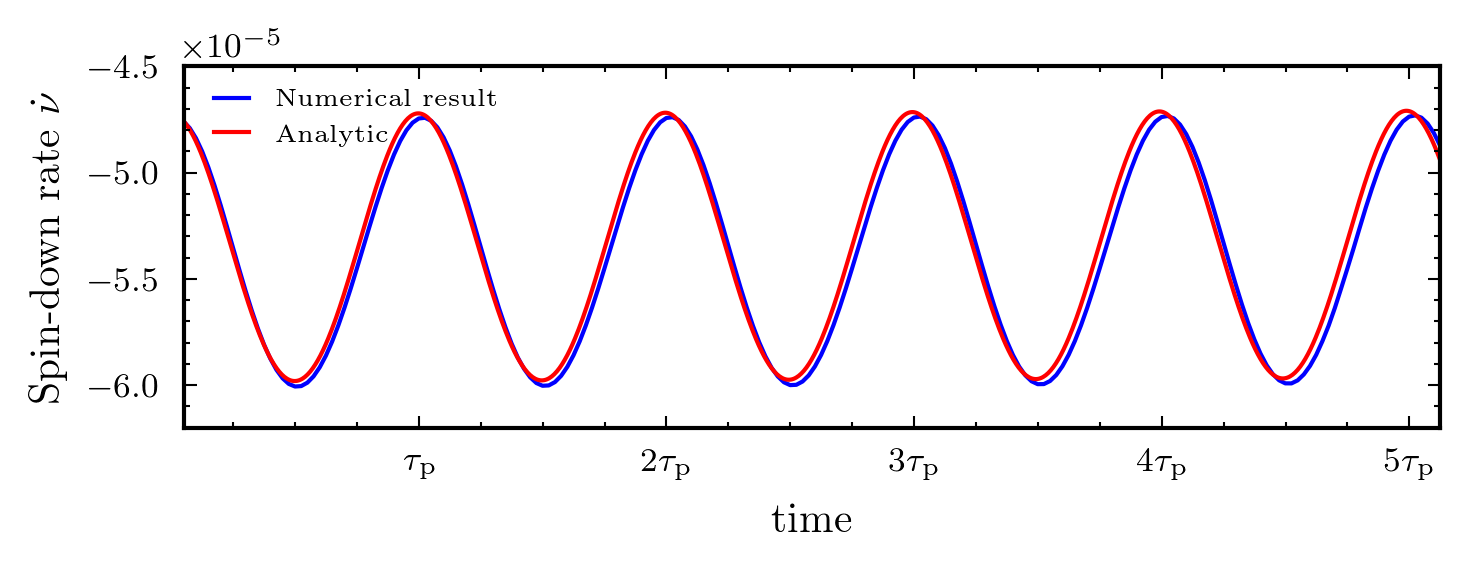

In [19]:
a0 = 4
chi0 = 49.99
file_name = main(chi0=chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 )
PD = nsmod.File_Functions.Parameter_Dictionary(file_name)
tauAge = PD['tauE']
ax = Plot.SpindownRate(file_name, label="Numerical result", figsize=(5, 2))
ax.plot(time, nudot(time, P, tauP, tauAge, theta=a0, chi=chi0), "r", label="Analytic")
ax.legend(loc=2, frameon=False, fontsize=6)
ax.set_ylim(-6.2e-5, -4.5e-5)
plt.tight_layout()
plt.savefig("img/SpindownRate_normal.pdf")
File_Functions.PropertiesTable(file_name, "SpindownRate_normal")

./data/Unknown_SpindownTorqueSwitching_1_chi0_8.8000000000e+01_omega0_1.55e+03_epsI3_4.65e-06_AnomTorqueSwitching_1_epsA_6.94e-09_a0_4.0000000000e+00_SwitchTime_1.00e+02_AnomTorque_1_upsilon_0.00e+00_n_500000_epsI1_0.00e+00_T_4.53e+03.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_8.8000000000e+01_omega0_1.55e+03_epsI3_4.65e-06_AnomTorqueSwitching_1_epsA_6.94e-09_a0_4.0000000000e+00_SwitchTime_1.00e+02_AnomTorque_1_upsilon_0.00e+00_n_500000_epsI1_0.00e+00_T_4.53e+03.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


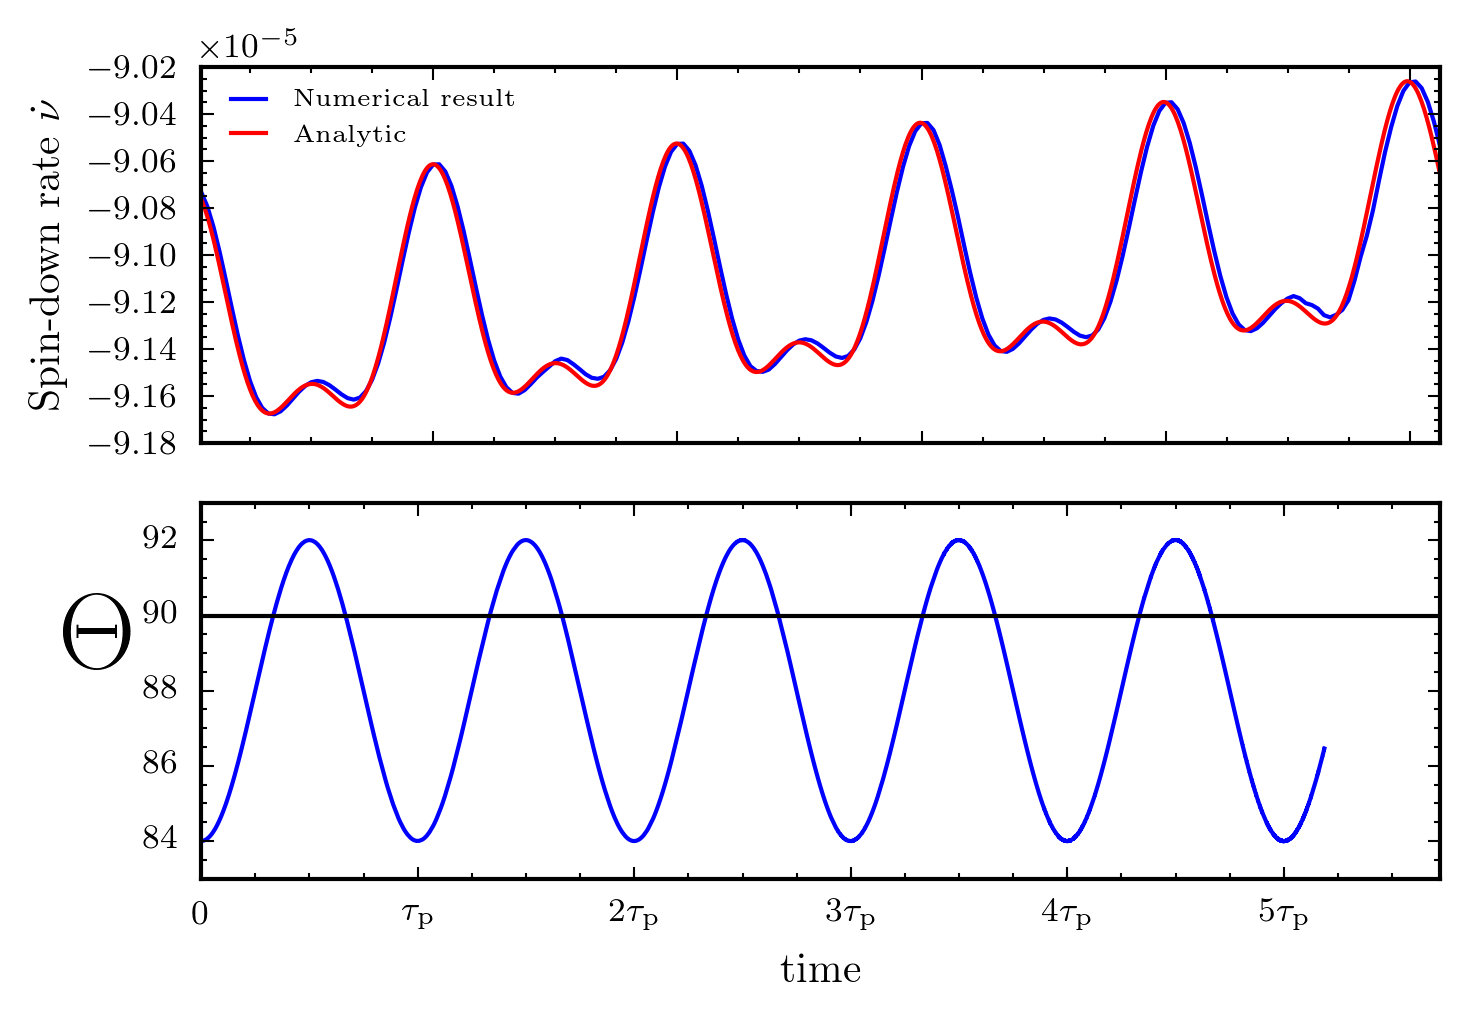

In [14]:
a0 = 4
chi0 = 88
file_name = main(chi0=chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 )

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5))

ax1 = Plot.SpindownRate(file_name, label="Numerical result", ax=ax1)
ax1.set_xlabel("")
ax1.set_xticklabels([])
PD = nsmod.File_Functions.Parameter_Dictionary(file_name)
tauAge = PD['tauE']
ax1.plot(time, nudot(time, P, tauP, tauAge, theta=a0, chi=chi0), "r", 
        label="Analytic")
ax1.legend(loc=2, fontsize=6, frameon=False)


ax2 = Plot.big_theta(file_name, ax=ax2)
ax2.axhline(90, color="k")
ax2.set_ylabel("$\Theta$", labelpad=10)
plt.tight_layout()
plt.savefig("img/SpindownRate_orthog.pdf")
File_Functions.PropertiesTable(file_name, "SpindownRate_orthog")